In [1]:
import os
from PIL import Image
import getpass 
import glob
import time
import xml.etree.ElementTree as ET
from math import pi
from math import cos
from sentinelsat import SentinelAPI
import geopandas as gpd
import folium 
from shapely.geometry import MultiPolygon, Polygon
import rasterio
import pandas as pd
from os import listdir
import rasterio.mask
from os.path import isfile, join
import fiona
import shutil

In [46]:
path = ''
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

In [47]:
path2 = join(path, 'ShapeFile')
os.mkdir(path2)

In [48]:

fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw' # enable KML support which is disabled by 


In [49]:
for kml in onlyfiles:
    path3 = join(path, kml)
    a = gpd.read_file(path3)
    kml_name = kml.split('.')[0]
    a.to_file(join(path2, kml_name),driver='ESRI Shapefile')


DriverError: 'C:\Users\comet\Desktop\Coding\Geodata\geckodriver.log' not recognized as a supported file format.

In [15]:

user = '' 
password = '' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')


In [3]:
root= ''
shpfilelist = [os.path.join(root, name)
             for root, dirs, files in os.walk(root)
             for name in files
             if name.endswith(".shp") and name.find('CentP')>=0]
shpfilelist

['C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\100_CentP\\100_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\101_CentP\\101_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\102_CentP\\102_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\103_CentP\\103_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\104_CentP\\104_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\105_CentP\\105_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\106_CentP\\106_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\107_CentP\\107_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\108_CentP\\108_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\109_CentP\\109_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\10_CentP\\10_CentP.shp',
 'C:\\Users\\comet\\Desktop\\Coding\\Geodata\\ShapeFile\\110_CentP\\110_CentP.

In [18]:
for shpfile in shpfilelist:
    nReserve = gpd.read_file(shpfile)
    m = folium.Map([0,0], zoom_start=12)
    folium.GeoJson(nReserve).add_to(m)
    footprint = None
    for i in nReserve['geometry']:
        footprint = i
    products = api.query(footprint,
                date = ('20161024', '20200716'),
                platformname = 'Sentinel-2',
                processinglevel = 'Level-2A',
                cloudcoverpercentage = (0,10)
            )
    products_gdf = api.to_geodataframe(products)
    products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
    products_gdf_sorted = products_gdf_sorted.head(1)
    api.download(products_gdf_sorted.index.values[0], directory_path=r'D:\SentSat')


    #too much data for regular 
    #change it to 1.75km squares and then divide it up

Querying products: 100%|██████████| 166/166 [00:01<00:00, 105.15 products/s]
Downloading: 100%|██████████| 1.14G/1.14G [02:49<00:00, 6.72MB/s]
MD5 checksumming: 100%|██████████| 1.14G/1.14G [00:02<00:00, 409MB/s]
Downloading: 100%|██████████| 1.07G/1.07G [02:39<00:00, 6.73MB/s]
MD5 checksumming: 100%|██████████| 1.07G/1.07G [00:02<00:00, 409MB/s]
Downloading: 100%|██████████| 809M/809M [01:56<00:00, 6.92MB/s]
MD5 checksumming: 100%|██████████| 809M/809M [00:02<00:00, 401MB/s]
Downloading: 100%|██████████| 660M/660M [01:34<00:00, 6.98MB/s]
MD5 checksumming: 100%|██████████| 660M/660M [00:01<00:00, 404MB/s]
Product 73790a25-144f-4127-ade9-14e3db8c2c6d is not online. Triggering retrieval from long term archive.
Downloading: 100%|██████████| 1.05G/1.05G [02:26<00:00, 7.13MB/s]
MD5 checksumming: 100%|██████████| 1.05G/1.05G [00:02<00:00, 413MB/s]
Downloading: 100%|██████████| 1.21G/1.21G [02:16<00:00, 8.80MB/s]
MD5 checksumming: 100%|██████████| 1.21G/1.21G [00:03<00:00, 401MB/s]
Downloadin

In [10]:
path = ''
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles
biglist = list(listdir(path))
ziplist = []
zipped = []
for list1 in biglist:
    if(list1.endswith('.zip')):
        ziplist.append(list1)
    else:
        zipped.append(list1)
zipped = sorted(zipped)
ziplist = sorted(zipped)


['S2A_MSIL2A_20191002T075741_N0213_R035_T38TLN_20191002T105018',
 'S2A_MSIL2A_20200225T081921_N0214_R121_T36SWC_20200225T101327',
 'S2A_MSIL2A_20200302T083841_N0214_R064_T35RNM_20200302T120522',
 'S2A_MSIL2A_20200418T082601_N0214_R021_T36SWC_20200418T111534',
 'S2A_MSIL2A_20200607T082611_N0214_R021_T36SVB_20200607T115845',
 'S2B_MSIL2A_20190517T074619_N0212_R135_T38TMQ_20190517T103449',
 'S2B_MSIL2A_20190706T074619_N0212_R135_T38TPT_20190706T102921',
 'S2B_MSIL2A_20190903T081609_N0213_R121_T37SCB_20190903T120314',
 'S2B_MSIL2A_20190903T081609_N0213_R121_T37SDC_20190903T120314',
 'S2B_MSIL2A_20190920T080609_N0213_R078_T37TEE_20190920T120932',
 'S2B_MSIL2A_20190920T080609_N0213_R078_T37TFE_20190920T120932',
 'S2B_MSIL2A_20190930T080729_N0213_R078_T37SED_20190930T114434',
 'S2B_MSIL2A_20191004T074749_N0213_R135_T38UQU_20191004T102720',
 'S2B_MSIL2A_20191013T081859_N0213_R121_T37SCC_20191013T120931',
 'S2B_MSIL2A_20191019T083949_N0213_R064_T36RTU_20191019T123417',
 'S2B_MSIL2A_20191101T085

In [25]:
import matplotlib.pyplot as plt
from rasterio import plot
%matplotlib inline

In [28]:
imagePath = ''
band2 = rasterio.open(imagePath+'T38TLN_20191002T075741_B02_10m.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath+'T38TLN_20191002T075741_B03_10m.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath+'T38TLN_20191002T075741_B04_10m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath+'T38TLN_20191002T075741_B08_10m.jp2', driver='JP2OpenJPEG') #nir

trueColor = rasterio.open('test.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()

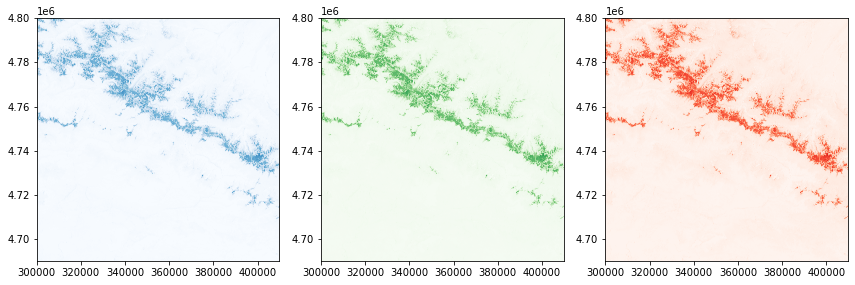

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()


In [38]:
import xml.etree.ElementTree as ET

In [41]:
path = r''
onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith(".kml")]
namespace = '{http://www.opengis.net/kml/2.2}'
coordinates = []
for fil in onlyfiles:
    fp = open(join(path, fil), 'r')
    element = ET.parse(fp)
    coordinates.append(element.findall(('{0}Document/{0}Placemark/{0}Polygon/{0}outerBoundaryIs/{0}LinearRing/{0}coordinates'.format(namespace)))[0].text) 


60315,40.03275751747209 40.03756380060315,40.00131648252791 39.99651019939685,40.00131648252791 39.99651019939685,40.03275751747209 40.03756380060315,40.03275751747209',
 '40.10206522800064,40.09723951747209 40.10206522800064,40.06579848252791 40.06097277199936,40.06579848252791 40.06097277199936,40.09723951747209 40.10206522800064,40.09723951747209',
 '29.583073787934335,29.58072051747209 29.583073787934335,29.54927948252791 29.546926212065667,29.54927948252791 29.546926212065667,29.58072051747209 29.583073787934335,29.58072051747209',
 '44.76365514841192,44.75724311747209 44.76365514841192,44.72580208252791 44.719390051588086,44.72580208252791 44.719390051588086,44.75724311747209 44.76365514841192,44.75724311747209',
 '41.7598177674177,41.75447051747209 41.7598177674177,41.72302948252791 41.717682232582305,41.72302948252791 41.717682232582305,41.75447051747209 41.7598177674177,41.75447051747209',
 '29.652588246784312,29.65022251747209 29.652588246784312,29.61878148252791 29.616415753

In [20]:
path = r''
walked = list(os.walk(path))
jp2list = []
for i in range(len(walked)):
    if(walked[i][0].find('IMG_DATA')>=0 and walked[i][0].find('R10m')>=0):
        jp2list.append(walked[i])

In [21]:
list(jp2list)

2A_MSIL2A_20191125T160611_N0213_R097_T17SQB_20191125T200056.SAFE\\GRANULE\\L2A_T17SQB_A023117_20191125T160712\\IMG_DATA\\R10m',
  [],
  ['T17SQB_20191125T160611_AOT_10m.jp2',
   'T17SQB_20191125T160611_B02_10m.jp2',
   'T17SQB_20191125T160611_B03_10m.jp2',
   'T17SQB_20191125T160611_B04_10m.jp2',
   'T17SQB_20191125T160611_B08_10m.jp2',
   'T17SQB_20191125T160611_TCI_10m.jp2',
   'T17SQB_20191125T160611_WVP_10m.jp2']),
 ('D:\\SentSat\\S2A_MSIL2A_20191204T163651_N0213_R083_T16SFJ_20191204T191616\\S2A_MSIL2A_20191204T163651_N0213_R083_T16SFJ_20191204T191616.SAFE\\GRANULE\\L2A_T16SFJ_A023246_20191204T163645\\IMG_DATA\\R10m',
  [],
  ['T16SFJ_20191204T163651_AOT_10m.jp2',
   'T16SFJ_20191204T163651_B02_10m.jp2',
   'T16SFJ_20191204T163651_B03_10m.jp2',
   'T16SFJ_20191204T163651_B04_10m.jp2',
   'T16SFJ_20191204T163651_B08_10m.jp2',
   'T16SFJ_20191204T163651_TCI_10m.jp2',
   'T16SFJ_20191204T163651_WVP_10m.jp2']),
 ('D:\\SentSat\\S2A_MSIL2A_20200203T160451_N0213_R097_T17RLM_20200203T20254

In [22]:
for jp2 in jp2list:
    path = jp2[0]
    jp2base = [x for x in jp2[2] if x.find('B02')>=0][0]
    newname = jp2base.replace('.jp2','')
    band2 = rasterio.open(join(path, jp2base), driver='JP2OpenJPEG') #blue
    band3 = rasterio.open(join(path, jp2base.replace('B02','B03')), driver='JP2OpenJPEG') #green
    band4 = rasterio.open(join(path, jp2base.replace('B02','B04')), driver='JP2OpenJPEG') #red
    band8 = rasterio.open(join(path, jp2base.replace('B02','B08')), driver='JP2OpenJPEG') #nir
    trueColor = rasterio.open(newname+'.tiff','w',driver='Gtiff',
                            width=band4.width, height=band4.height,
                            count=3,
                            crs=band4.crs,
                            transform=band4.transform,
                            dtype=band4.dtypes[0]
                            )
    trueColor.write(band2.read(1),3) #blue
    trueColor.write(band3.read(1),2) #green
    trueColor.write(band4.read(1),1) #red
    trueColor.close()




    

In [3]:
root= r''
shpfilelist = [os.path.join(root, name)
             for root, dirs, files in os.walk(root)
             for name in files
             if name.endswith(".shp") and name.find('CentP')>=0]
path = r''
tiffs = [os.path.join(path , name)
             for root, dirs, files in os.walk(path )
             for name in files
             ]

['D:\\SentSatTiffs\\T10SEG_20191022T185429_B02_10m.tiff', 'D:\\SentSatTiffs\\T10SFG_20191116T185651_B02_10m.tiff', 'D:\\SentSatTiffs\\T10TER_20191010T190311_B02_10m.tiff', 'D:\\SentSatTiffs\\T10TET_20190720T190919_B02_10m.tiff', 'D:\\SentSatTiffs\\T10TFP_20190826T185919_B02_10m.tiff', 'D:\\SentSatTiffs\\T10UEU_20190804T190921_B02_10m.tiff', 'D:\\SentSatTiffs\\T11SLT_20191021T183411_B02_10m.tiff', 'D:\\SentSatTiffs\\T11SLT_20191105T183539_B02_10m.tiff', 'D:\\SentSatTiffs\\T11SMS_20191026T183449_B02_10m.tiff', 'D:\\SentSatTiffs\\T13TDE_20190914T174939_B02_10m.tiff', 'D:\\SentSatTiffs\\T14RNT_20200424T170851_B02_10m.tiff', 'D:\\SentSatTiffs\\T14RNU_20191201T171649_B02_10m.tiff', 'D:\\SentSatTiffs\\T14RQT_20191118T170609_B02_10m.tiff', 'D:\\SentSatTiffs\\T14SNG_20190905T171859_B02_10m.tiff', 'D:\\SentSatTiffs\\T14SQB_20191118T170609_B02_10m.tiff', 'D:\\SentSatTiffs\\T15RTN_20191118T170609_B02_10m.tiff', 'D:\\SentSatTiffs\\T15RTP_20191118T170609_B02_10m.tiff', 'D:\\SentSatTiffs\\T15SUD_2019

In [5]:
file = open('output.txt', 'x')
for shpfile in shpfilelist:
    nReserve = gpd.read_file(shpfile)
    nReserve_proj = nReserve.to_crs({'init': 'epsg:32633'})
    for tiff in tiffs:
        try:
            with rasterio.open(tiff) as src:
                out_image, out_transform = rasterio.mask.mask(src, nReserve_proj.geometry,crop=True)
                file.write(tiff + ' does work with ' + shpfile+ '\n')
        except ValueError:
           file.write(tiff + ' does not work with '+ shpfile+ '\n')




In [30]:
tiff = r''
mask = r''

nReserve = gpd.read_file(mask)
nReserve_proj = nReserve.to_crs({'init': 'epsg:32633'})

with rasterio.open(tiff) as src:
    out_image, out_transform = rasterio.mask.mask(src, nReserve_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

ValueError: Input shapes do not overlap raster.